<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n20.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,36.992101,48.541691,-88.183270,7.350522,101.697483,-94.346961
1,0.0,1.0,21.741184,68.629663,102.474625,202.845472,99.528024,103.317447
2,0.0,2.0,73.865186,50.924671,49.007466,183.797323,108.662780,75.134543
3,0.0,3.0,24.162855,80.524474,212.838728,327.526057,100.381752,227.144304
4,0.0,4.0,76.821445,97.695646,-245.371049,-60.853958,110.793718,-171.647675
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,40.953073,84.436243,-80.276713,55.112603,68.571269,-13.458666
29996,999.0,26.0,65.663057,65.510956,-74.834107,66.339906,160.426010,-94.086104
29997,999.0,27.0,27.361805,34.195506,-54.936812,16.620499,76.429504,-59.809005
29998,999.0,28.0,73.797444,53.332605,139.641247,276.771295,196.389790,80.381506


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,36.992101,48.541691,-88.183270,7.350522,101.697483,-94.346961
1,0.0,1.0,21.741184,68.629663,102.474625,202.845472,99.528024,103.317447
2,0.0,2.0,73.865186,50.924671,49.007466,183.797323,108.662780,75.134543
3,0.0,3.0,24.162855,80.524474,212.838728,327.526057,100.381752,227.144304
4,0.0,4.0,76.821445,97.695646,-245.371049,-60.853958,110.793718,-171.647675
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,40.953073,84.436243,-80.276713,55.112603,68.571269,-13.458666
29996,999.0,26.0,65.663057,65.510956,-74.834107,66.339906,160.426010,-94.086104
29997,999.0,27.0,27.361805,34.195506,-54.936812,16.620499,76.429504,-59.809005
29998,999.0,28.0,73.797444,53.332605,139.641247,276.771295,196.389790,80.381506


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    36.992101  48.541691  -88.183270    7.350522  101.697483   
      1.0    21.741184  68.629663  102.474625  202.845472   99.528024   
      2.0    73.865186  50.924671   49.007466  183.797323  108.662780   
      3.0    24.162855  80.524474  212.838728  327.526057  100.381752   
      4.0    76.821445  97.695646 -245.371049  -60.853958  110.793718   
...                ...        ...         ...         ...         ...   
999.0 25.0   40.953073  84.436243  -80.276713   55.112603   68.571269   
      26.0   65.663057  65.510956  -74.834107   66.339906  160.426010   
      27.0   27.361805  34.195506  -54.936812   16.620499   76.429504   
      28.0   73.797444  53.332605  139.641247  276.771295  196.389790   
      29.0   73.357925  58.060561  124.894454  266.312941  190.528916   

                  e_hat  
rep   index              
0.0   0.0    -94.346961  
      1.0    103.317447  
      2.0     75.134543  
      3.0    227.144304  
      4.0   -171.647675  
...                 ...  
999.0 25.0   -13.458666  
      26.0   -94.086104  
      27.0   -59.809005  
      28.0    80.381506  
      29.0    75.784024  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    36.992101  48.541691  -88.183270    7.350522  101.697483   
      1.0    21.741184  68.629663  102.474625  202.845472   99.528024   
      2.0    73.865186  50.924671   49.007466  183.797323  108.662780   
      3.0    24.162855  80.524474  212.838728  327.526057  100.381752   
      4.0    76.821445  97.695646 -245.371049  -60.853958  110.793718   
...                ...        ...         ...         ...         ...   
999.0 25.0   40.953073  84.436243  -80.276713   55.112603   68.571269   
      26.0   65.663057  65.510956  -74.834107   66.339906  160.426010   
      27.0   27.361805  34.195506  -54.936812   16.620499   76.429504   
      28.0   73.797444  53.332605  139.641247  276.771295  196.389790   
      29.0   73.357925  58.060561  124.894454  266.312941  190.528916   

                  e_hat  
rep   index              
0.0   0.0    -94.346961  
      1.0    103.317447  
      2.0     75.134543  
      3.0    227.144304  
      4.0   -171.647675  
...                 ...  
999.0 25.0   -13.458666  
      26.0   -94.086104  
      27.0   -59.809005  
      28.0    80.381506  
      29.0    75.784024  

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,36.992101,48.541691,-88.183270,7.350522,101.697483,-94.346961
1,0.0,1.0,21.741184,68.629663,102.474625,202.845472,99.528024,103.317447
2,0.0,2.0,73.865186,50.924671,49.007466,183.797323,108.662780,75.134543
3,0.0,3.0,24.162855,80.524474,212.838728,327.526057,100.381752,227.144304
4,0.0,4.0,76.821445,97.695646,-245.371049,-60.853958,110.793718,-171.647675
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,40.953073,84.436243,-80.276713,55.112603,68.571269,-13.458666
29996,999.0,26.0,65.663057,65.510956,-74.834107,66.339906,160.426010,-94.086104
29997,999.0,27.0,27.361805,34.195506,-54.936812,16.620499,76.429504,-59.809005
29998,999.0,28.0,73.797444,53.332605,139.641247,276.771295,196.389790,80.381506


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    36.992101  48.541691  -88.183270    7.350522  101.697483   
      1.0    21.741184  68.629663  102.474625  202.845472   99.528024   
      2.0    73.865186  50.924671   49.007466  183.797323  108.662780   
      3.0    24.162855  80.524474  212.838728  327.526057  100.381752   
      4.0    76.821445  97.695646 -245.371049  -60.853958  110.793718   
...                ...        ...         ...         ...         ...   
999.0 25.0   40.953073  84.436243  -80.276713   55.112603   68.571269   
      26.0   65.663057  65.510956  -74.834107   66.339906  160.426010   
      27.0   27.361805  34.195506  -54.936812   16.620499   76.429504   
      28.0   73.797444  53.332605  139.641247  276.771295  196.389790   
      29.0   73.357925  58.060561  124.894454  266.312941  190.528916   

                  e_hat  
rep   index              
0.0   0.0    -94.346961  
      1.0    103.317447  
      2.0     75.134543  
      3.0    227.144304  
      4.0   -171.647675  
...                 ...  
999.0 25.0   -13.458666  
      26.0   -94.086104  
      27.0   -59.809005  
      28.0    80.381506  
      29.0    75.784024  

[30000 rows x 6 columns]

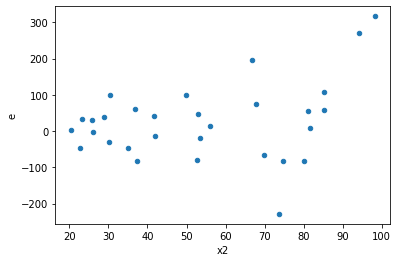

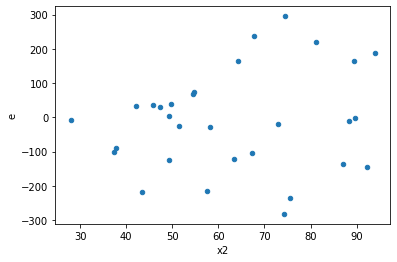

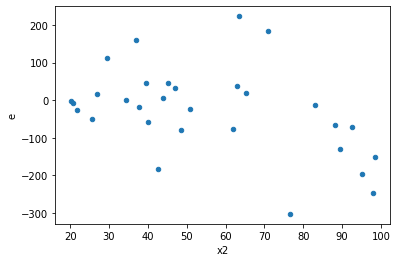

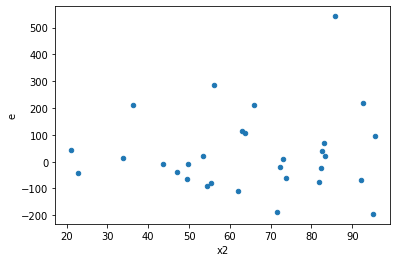

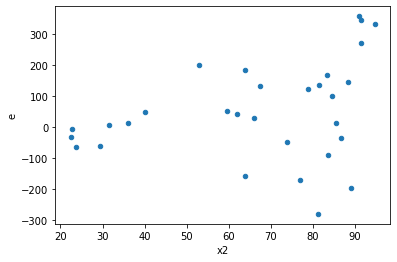

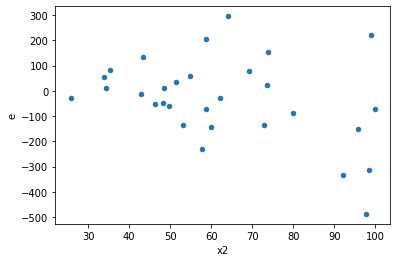

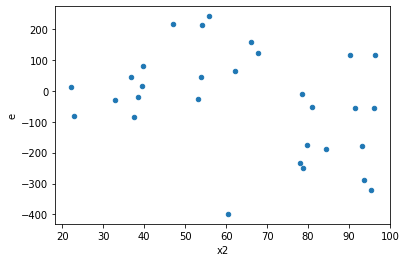

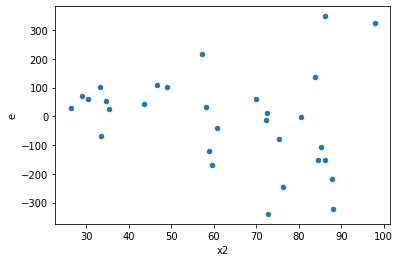

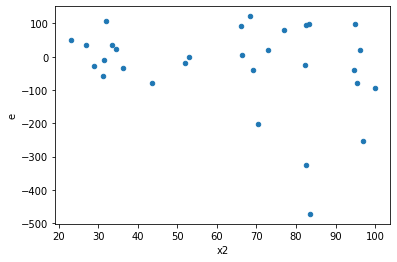

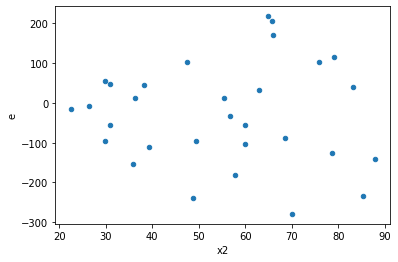

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,150283.15192954548,418966.9821176153,15028.315192954547,41896.698211761526,2.787850645520344,0.12131734664885951,0.9393413266755702,0.06065867332442976,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,31276.67226894814,335205.0844176058,3127.667226894814,33520.508441760576,10.717415252338128,0.0008502019130200988,0.99957489904349,0.0004251009565100494,Reject005=0 : Heteroscedasticity
4.0,10.0,10.0,39552.15153834649,90266.89568410849,3955.215153834649,9026.68956841085,2.282224662205625,0.20926832773941229,0.8953658361302939,0.10463416386970614,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,78939.34358471498,865456.7255502659,7893.934358471498,86545.67255502658,10.963566280754382,0.0007710685168933473,0.9996144657415533,0.00038553425844667366,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,94207.58848824396,682671.4959533795,9420.758848824396,68267.14959533795,7.24645972695256,0.0043246640884817555,0.9978376679557591,0.0021623320442408778,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,42171.84890552168,283178.7284810777,4217.184890552167,28317.87284810777,6.7148758195422715,0.005851828260626135,0.9970740858696869,0.0029259141303130676,Reject005=0 : Heteroscedasticity
9.0,10.0,10.0,27848.554735974245,443179.50771753746,2784.8554735974244,44317.95077175375,15.913914094258057,0.00014880299109143458,0.9999255985044543,7.440149554571729e-05,Reject005=0 : Heteroscedasticity
10.0,10.0,10.0,19125.618399300187,184333.67826843009,1912.5618399300188,18433.36782684301,9.638050619852109,0.0013363678524163092,0.9993318160737918,0.0006681839262081546,Reject005=0 : Heteroscedasticity
11.0,10.0,10.0,87088.7776570593,259890.63637920716,8708.877765705929,25989.063637920717,2.984203514746895,0.09940638442169125,0.9502968077891544,0.049703192210845626,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,150283.15192954548,418966.9821176153,15028.315192954547,41896.698211761526,2.787850645520344,0.12131734664885951,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,340229.7530149958,65179.59327755281,34022.97530149958,6517.959327755281,0.1915752302670601,0.015290421121506055,Reject005=0 : Heteroscedasticity
2.0,10.0,10.0,31276.67226894814,335205.0844176058,3127.667226894814,33520.508441760576,10.717415252338128,0.0008502019130200988,Reject005=0 : Heteroscedasticity
3.0,10.0,10.0,432074.25478536513,187082.48602163314,43207.42547853651,18708.248602163316,0.4329868858179649,0.20294618708003134,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,39552.15153834649,90266.89568410849,3955.215153834649,9026.68956841085,2.282224662205625,0.20926832773941229,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,78939.34358471498,865456.7255502659,7893.934358471498,86545.67255502658,10.963566280754382,0.0007710685168933473,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,94207.58848824396,682671.4959533795,9420.758848824396,68267.14959533795,7.24645972695256,0.0043246640884817555,Reject005=0 : Heteroscedasticity
7.0,10.0,10.0,165925.6465791172,128686.58276154622,16592.56465791172,12868.658276154621,0.7755677643250012,0.695468772321443,Reject005=1 : Homoscedasticity
8.0,10.0,10.0,42171.84890552168,283178.7284810777,4217.184890552167,28317.87284810777,6.7148758195422715,0.005851828260626135,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      522
Reject005=0 : Heteroscedasticity    478
Name: Result_test, dtype: int64